# Частина 1
​
В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [1]:
from keras.datasets import fashion_mnist
from keras import layers
from keras import models

from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

2024-12-11 14:44:27.534021: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train1 = x_train / 255.0
x_test1 = x_test / 255.0

y_train1 = to_categorical(y_train, 10)
y_test1 = to_categorical(y_test, 10)

In [4]:
model1 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/Users/lena/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history1 = model1.fit(x_train1, y_train1, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.6874 - loss: 0.8521 - val_accuracy: 0.8388 - val_loss: 0.4340
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 40ms/step - accuracy: 0.8415 - loss: 0.4279 - val_accuracy: 0.8563 - val_loss: 0.3863
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 39ms/step - accuracy: 0.8659 - loss: 0.3632 - val_accuracy: 0.8745 - val_loss: 0.3477
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 75s 35ms/step - accuracy: 0.8782 - loss: 0.3295 - val_accuracy: 0.8740 - val_loss: 0.3393
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 39ms/step - accuracy: 0.8882 - loss: 0.2994 - val_accuracy: 0.8788 - val_loss: 0.3328
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 39ms/step - accuracy: 0.9002 - loss: 0.2693 - val_accuracy: 0.8648 - val_loss: 0.3741
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 39ms/step - accuracy: 0.9090 - loss: 0.2448 - val_accuracy: 0.8823 - val_loss: 0.3385
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 40ms/step - accuracy: 0.9122 -

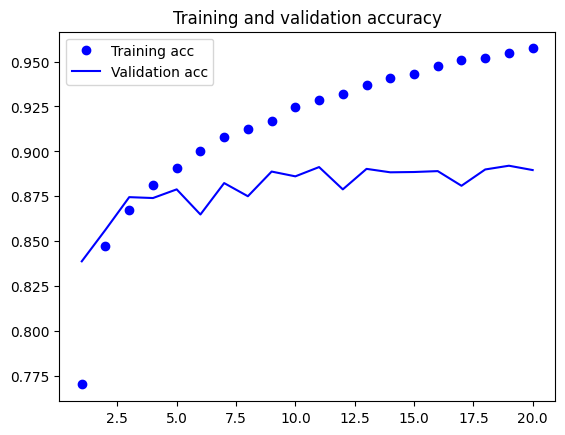

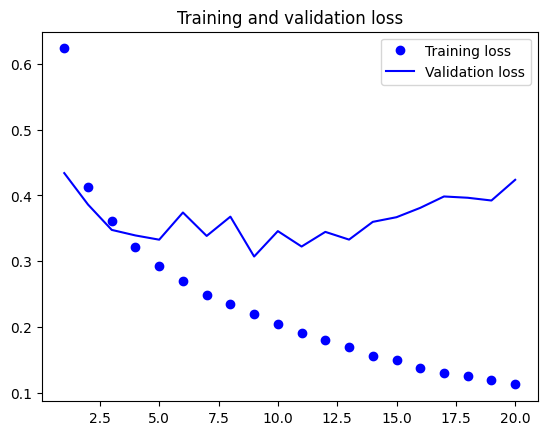

In [6]:
acc = history1.history["accuracy"]
val_acc = history1.history["val_accuracy"]

loss = history1.history["loss"]
val_loss = history1.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()


In [7]:
test_loss, test_accuracy = model1.evaluate(x_test1, y_test1, verbose=0)
print(f"Accurancy on test data: {test_accuracy:.2%}")
print(f"Loss on test data: {test_loss:.2%}")

Accurancy on test data: 88.44%
Loss on test data: 45.41%


# Частина 2
​
В цій частині ми знову будемо працювати з датасетом fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.

Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.

Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [8]:
import numpy as np
import tensorflow as tf

x_train2 = x_train / 255.0
x_test2 = x_test / 255.0

x_train2 = np.expand_dims(x_train2, axis=-1)
x_test2 = np.expand_dims(x_test2, axis=-1)

x_train2 = np.repeat(x_train2, 3, axis=-1)
x_test2 = np.repeat(x_test2, 3, axis=-1)

x_train2 = tf.image.resize(x_train2, (32, 32))
x_test2 = tf.image.resize(x_test2, (32, 32))

y_train2 = to_categorical(y_train, num_classes=10)
y_test2 = to_categorical(y_test, num_classes=10)

In [27]:
import tensorflow as tf

from keras.applications.vgg16 import VGG16
from keras import models
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

model2 = Sequential([
    conv_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
history2 = model2.fit(
    x_train2, y_train2,
    epochs=12,
    batch_size=256,
    validation_split=0.2
)


Epoch 1/12
188/188 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.5933 - loss: 1.1586 - val_accuracy: 0.8200 - val_loss: 0.4954
Epoch 2/12
188/188 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.8032 - loss: 0.5539 - val_accuracy: 0.8391 - val_loss: 0.4341
Epoch 3/12
188/188 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.8318 - loss: 0.4683 - val_accuracy: 0.8439 - val_loss: 0.4185
Epoch 4/12
188/188 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.8381 - loss: 0.4423 - val_accuracy: 0.8524 - val_loss: 0.3993
Epoch 5/12
188/188 ━━━━━━━━━━━━━━━━━━━━ 360s 2s/step - accuracy: 0.8475 - loss: 0.4222 - val_accuracy: 0.8565 - val_loss: 0.3865
Epoch 6/12
188/188 ━━━━━━━━━━━━━━━━━━━━ 360s 2s/step - accuracy: 0.8518 - loss: 0.4020 - val_accuracy: 0.8602 - val_loss: 0.3787
Epoch 7/12
188/188 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.8587 - loss: 0.3878 - val_accuracy: 0.8596 - val_loss: 0.3763
Epoch 8/12
188/188 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.8608 - loss: 0.3776 - val_accu

In [29]:
test_loss, test_accuracy = model2.evaluate(x_test2, y_test2, verbose=0)
print(f"Accurancy on test data: {test_accuracy:.2%}")
print(f"Loss on test data: {test_loss:.2%}")
    
# train_loss, train_acc = model2.evaluate(x_train2, y_train2)
# print(f'Accurancy on train data: {train_acc:.2%}')
# print(f'Loss on train data: {train_loss:.2%}')

Accurancy on test data: 86.87%
Loss on test data: 35.70%


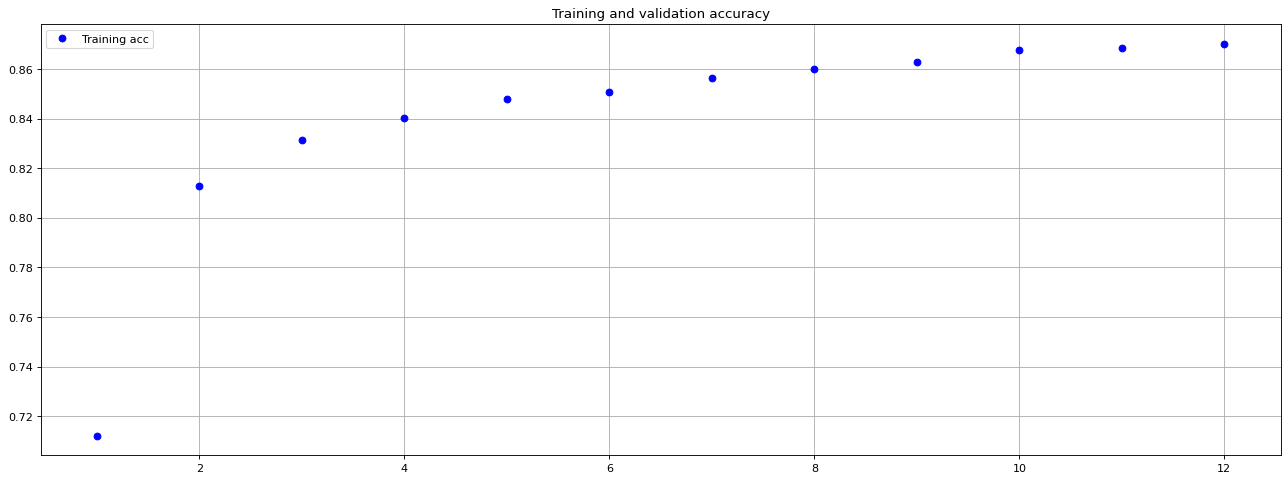

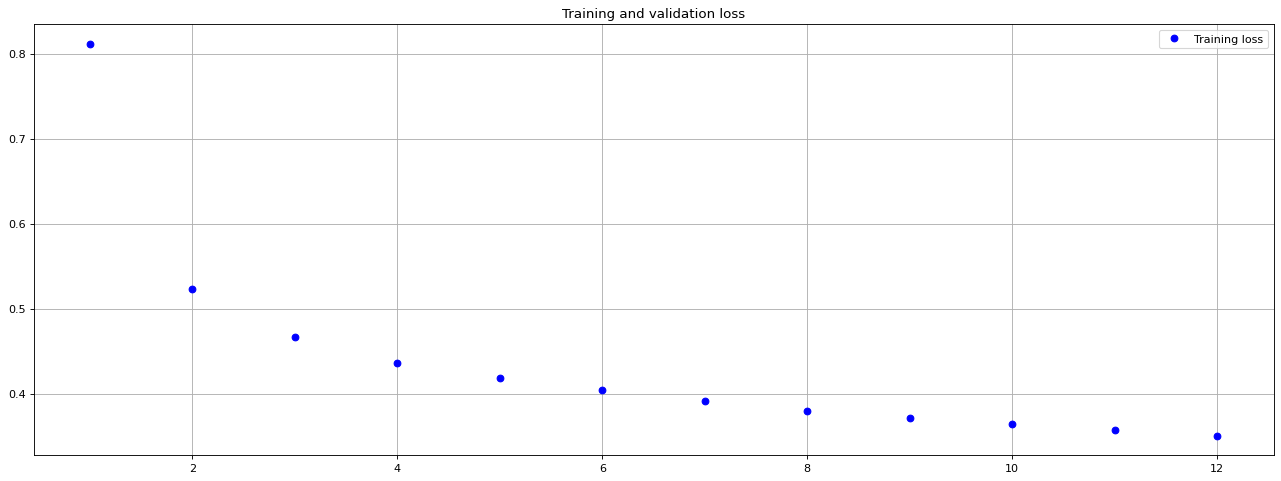

In [30]:
import matplotlib.pyplot as plt

acc = history2.history["accuracy"]
# val_acc = history2.history["val_accuracy"]

loss = history2.history["loss"]
# val_loss = history2.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
# plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
# plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")

plt.legend()
plt.show()


In [31]:
conv_base.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [32]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

modified_model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
    layers.Dense(10, activation='softmax')
])


In [34]:
modified_model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=["acc"]
)

modified_history = modified_model.fit(
    x_train2, y_train2,
    epochs=10,
    batch_size=256,
    validation_split=0.2
    
)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 955s 5s/step - acc: 0.7235 - loss: 0.1618 - val_acc: 0.8807 - val_loss: 0.0583
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 954s 5s/step - acc: 0.8893 - loss: 0.0540 - val_acc: 0.8898 - val_loss: 0.0539
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 953s 5s/step - acc: 0.9030 - loss: 0.0474 - val_acc: 0.9003 - val_loss: 0.0490
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 950s 5s/step - acc: 0.9103 - loss: 0.0440 - val_acc: 0.8953 - val_loss: 0.0512
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 957s 5s/step - acc: 0.9161 - loss: 0.0415 - val_acc: 0.9036 - val_loss: 0.0496
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 963s 5s/step - acc: 0.9211 - loss: 0.0386 - val_acc: 0.9070 - val_loss: 0.0474
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 965s 5s/step - acc: 0.9266 - loss: 0.0361 - val_acc: 0.9057 - val_loss: 0.0470
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 959s 5s/step - acc: 0.9333 - loss: 0.0339 - val_acc: 0.9047 - val_loss: 0.0496
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 963s 5s/

In [35]:
test_loss, test_accuracy = modified_model.evaluate(x_test2, y_test2, verbose=0)
print(f"Accurancy on test data: {test_accuracy:.2%}")
print(f"Loss on test data: {test_loss:.2%}")

Accurancy on test data: 90.22%
Loss on test data: 5.20%


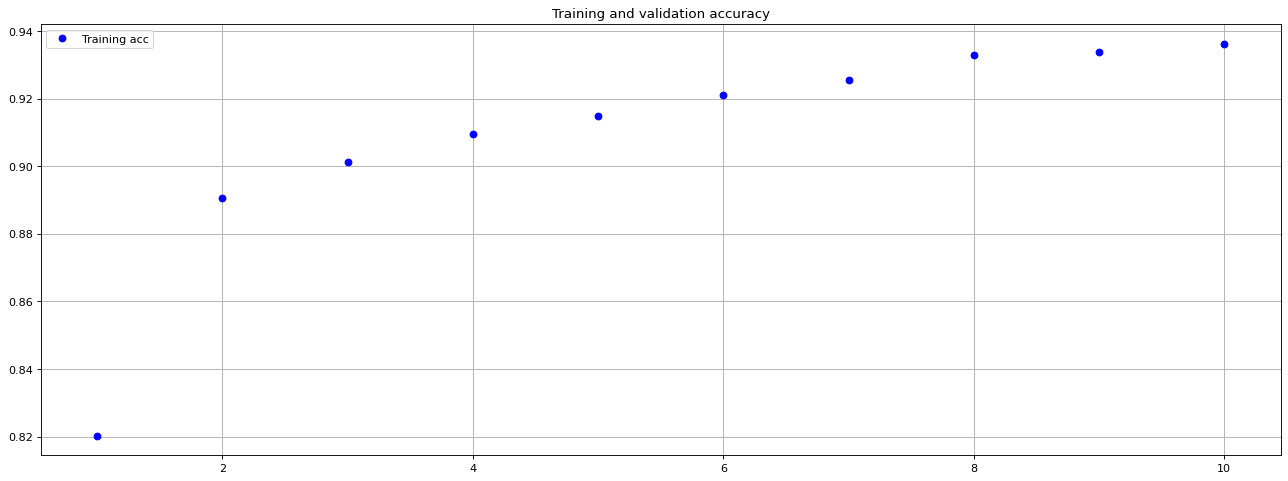

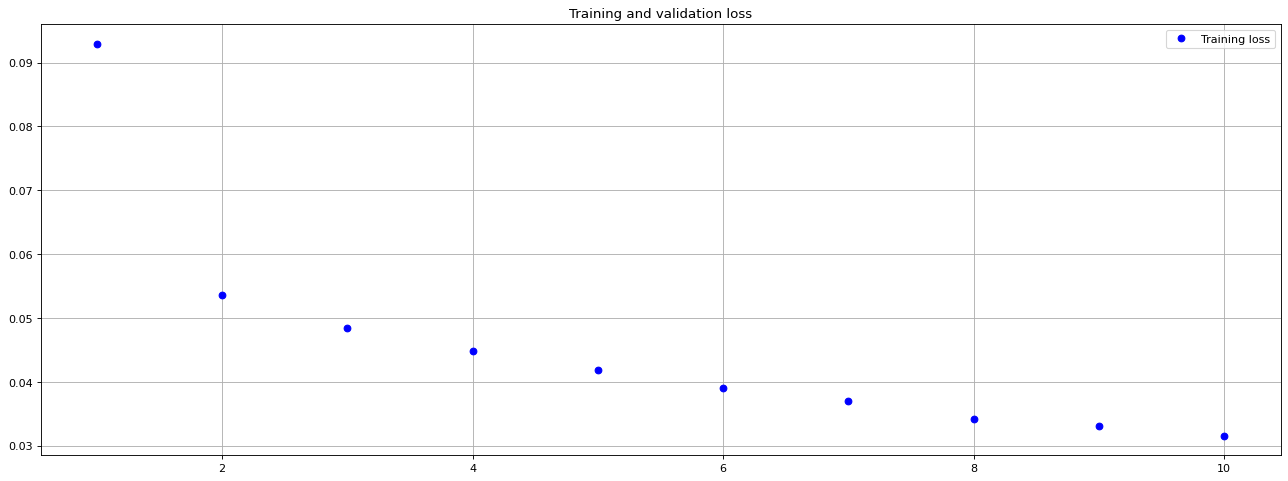

In [36]:
import matplotlib.pyplot as plt

acc = modified_history.history["acc"]
# val_acc = history2.history["val_accuracy"]

loss = modified_history.history["loss"]
# val_loss = history2.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
# plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
# plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")

plt.legend()
plt.show()


## Висновок
Згорткові мережі, особливо VGG16, значно перевершують багатошарову нейронну мережу у задачах класифікації зображень.